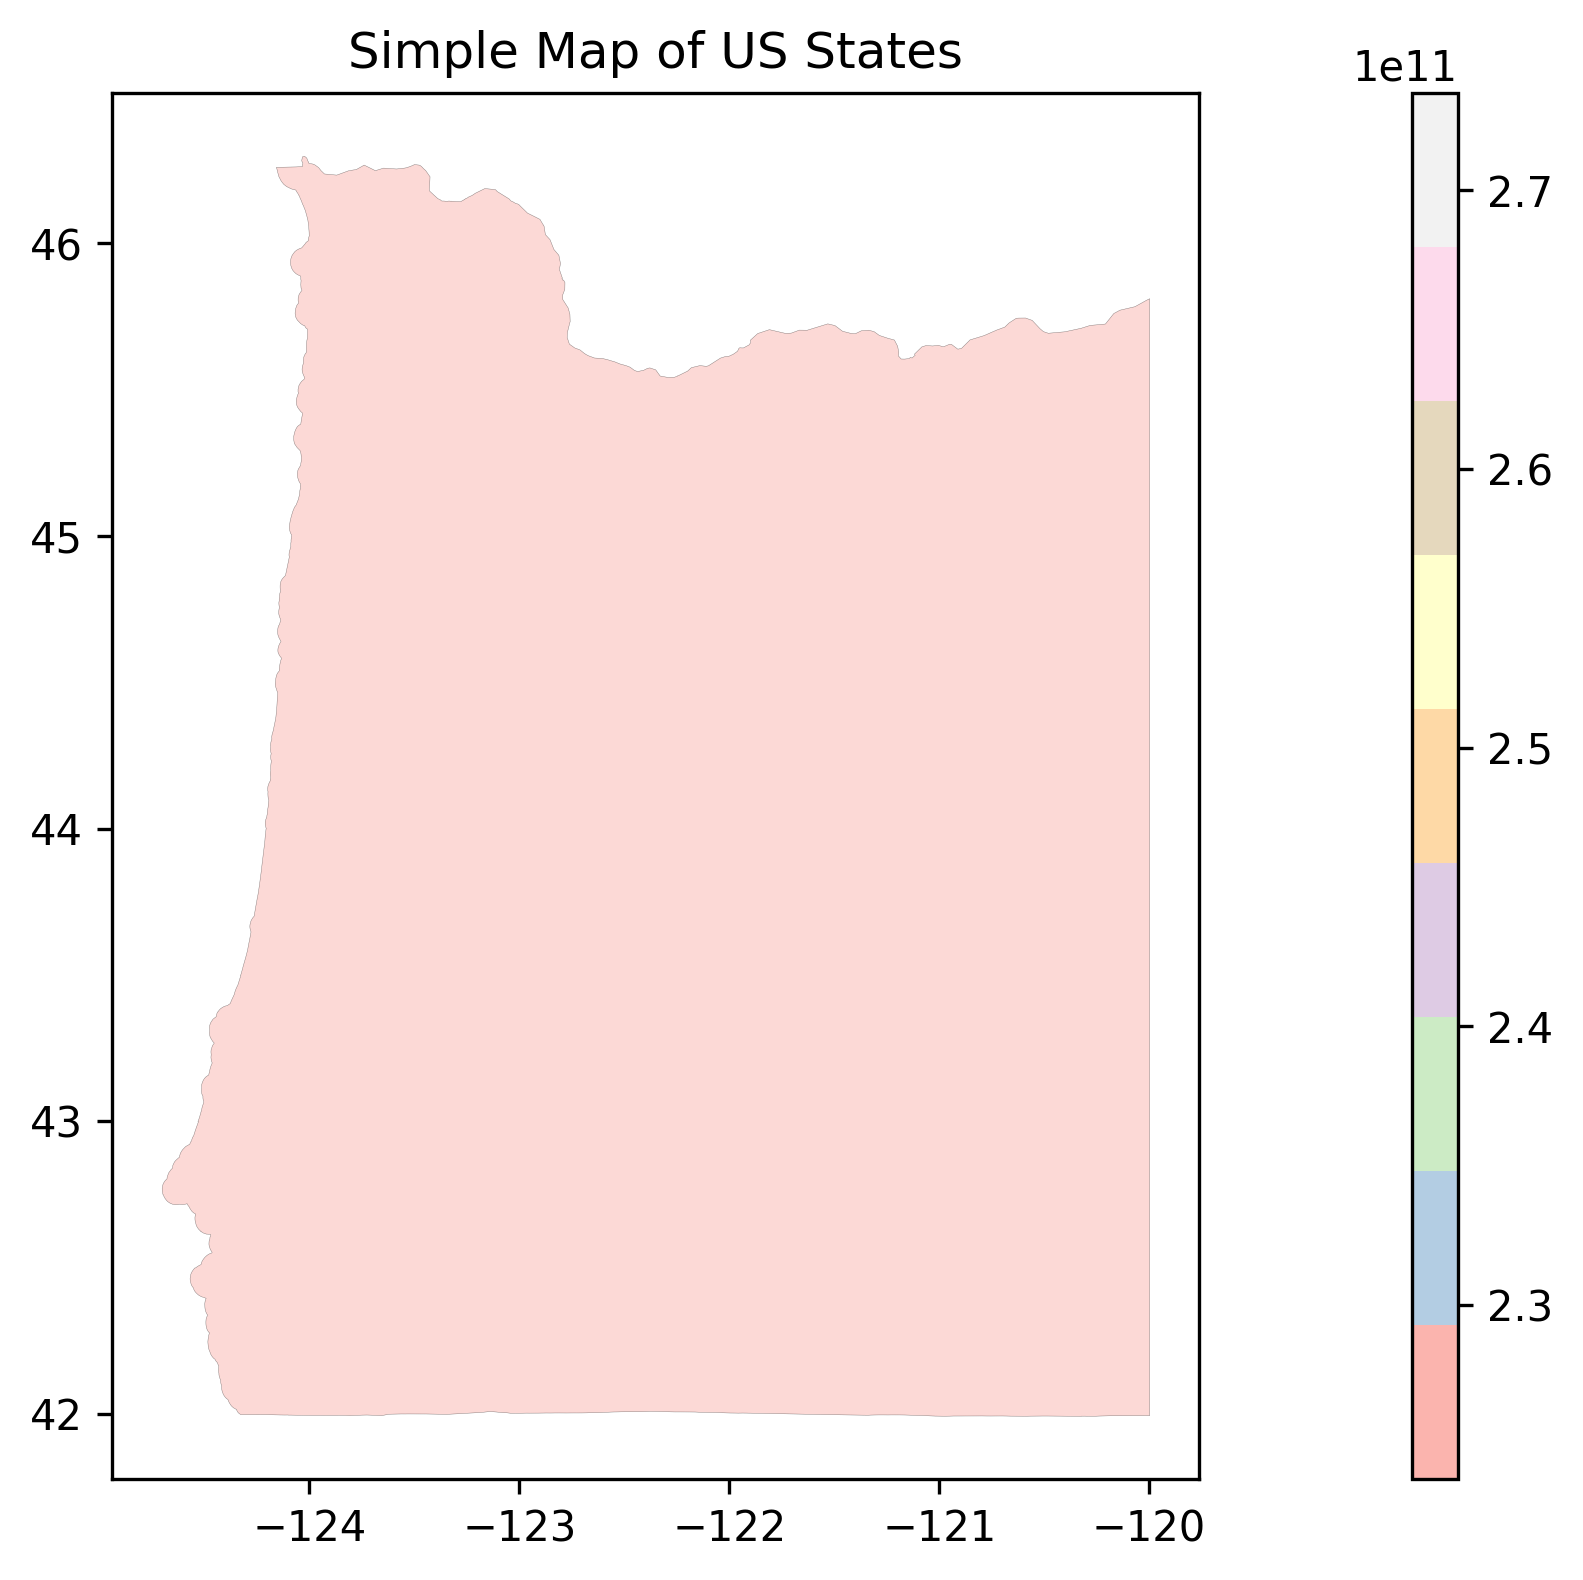

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from shapely.geometry import box
state_path = "../tiger-states/tl_2024_us_state.shp"

df = gpd.read_file(state_path)
df = df.to_crs("EPSG:4326")


us49 = df
us49 = us49.loc[us49['STUSPS'] == 'OR']

#turns out we need to clip it to be able to grab landcover data from https://www.mrlc.gov/viewer/
polygon = box(-125, 41.90, -120, 47)
poly_gdf = gpd.GeoDataFrame([1], geometry=[polygon], crs=us49.crs)
us49 = us49.clip(polygon)
#us49.to_file('dataframe.shp') 

#Plot
f,ax = plt.subplots(1,1, figsize=(8,6), sharex=True, sharey=True, dpi=300)
plt.title('Simple Map of US States')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%",pad=0,alpha=0.5)
us49.plot('ALAND', ax=ax, alpha=0.5, cmap='Pastel1', edgecolor='k', legend=True, cax=cax, linewidth=0.1)
plt.show()



c:\Users\maxno\OneDrive\Documents\personal_projects\worm-project\.env\Lib\site-packages\rasterio\__init__.py:368: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


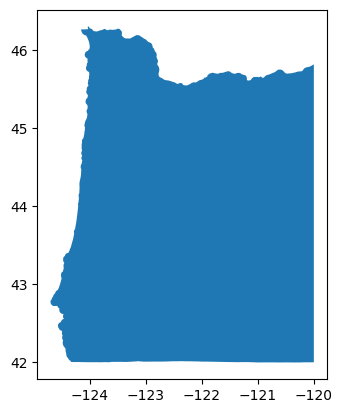

In [ ]:
import rasterio
from rasterio.transform import from_origin
from rasterio.plot import show

# Parameters

# Open the raster and update metadata
src = rasterio.open("../attempt_raster.tiff")
#calculated using GIMP

miles_per_pixel = 30/1277
# Georeferencing parameters (example values)
origin_x = -125.0  # Longitude of the upper-left corner
origin_y = 46.0    # Latitude of the upper-left corner

# Convert resolution to degrees if using a geographic CRS (adjust units if necessary)
resolution_deg = miles_per_pixel * (1.60934)  # miles to km (adjust for scale)

# Define affine transformation: from_origin(left, top, x_res, y_res)
transform = from_origin(origin_x, origin_y, resolution_deg, -resolution_deg)
src.transform = transform

#src.crs = 'EPSG:4326'  # Assign appropriate CRS

fig, ax = plt.subplots()

# transform rasterio plot to real world coords
#extent = [-125, 41.90, -120, 47]

#show(src,  ax=ax, )#extent = extent )
us49.plot(ax=ax)

plt.show()